In [ ]:
import numpy as np
from logistic_regression.GrdDscntQuant import grdescentquant
from logistic_regression.normal_logistic import normallogistic
from logistic_regression.GrdDscnt import grdescentnormal
from logistic_regression.quant_logistic import quant_logistic
from logistic_regression.GrdDscntUncoded import grdescentuncoded
from logistic_regression.uncoded_logistic import  uncoded_logistic
from quantization.quantize import quantize
from coded_computation.master import master
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import arff
from pad_and_clean import pad
from pad_and_clean import clean_and_scale
import time
from gen_data import gen_seperable_data, gen_margin_seperable_data
from sklearn.model_selection import train_test_split
from run_test import run

# do runs, make plots.

In [15]:
# seperable data #1
X,y,w = gen_seperable_data(800,100)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

run(30,X,y,"seperable1.csv")

0
813 0.055900621118012424 0.024844720496894408
1
774 0.055900621118012424 0.026397515527950312
2
926 0.055900621118012424 0.020186335403726708
3
839 0.055900621118012424 0.023291925465838508
4
826 0.049689440993788817 0.024844720496894408
5
822 0.049689440993788817 0.021739130434782608
6
874 0.055900621118012424 0.020186335403726708
7
856 0.049689440993788817 0.021739130434782608
8
821 0.055900621118012424 0.026397515527950312
9
908 0.055900621118012424 0.018633540372670808
10
857 0.062111801242236024 0.021739130434782608
11
861 0.055900621118012424 0.021739130434782608
12
878 0.055900621118012424 0.026397515527950312
13
774 0.049689440993788817 0.018633540372670808
14
865 0.055900621118012424 0.020186335403726708
15
817 0.055900621118012424 0.021739130434782608
16
830 0.062111801242236024 0.020186335403726708
17
765 0.062111801242236024 0.026397515527950312
18
752 0.055900621118012424 0.024844720496894408
19
830 0.055900621118012424 0.023291925465838508
20
804 0.055900621118012424 0.

0

In [16]:
# seperable data #2
X,y,w = gen_seperable_data(800,50)
X = scaler.fit_transform(X)
run(30,X,y,"seperable2.csv")

0
1082 0.043478260869565216 0.027950310559006212
1
1191 0.049689440993788817 0.029503105590062112
2
1096 0.049689440993788817 0.027950310559006212
3
1126 0.055900621118012424 0.029503105590062112
4
1152 0.043478260869565216 0.027950310559006212
5
1165 0.055900621118012424 0.029503105590062112
6
1104 0.043478260869565216 0.027950310559006212
7
1130 0.055900621118012424 0.029503105590062112
8
1100 0.049689440993788817 0.029503105590062112
9
1204 0.043478260869565216 0.026397515527950312
10
1073 0.062111801242236024 0.029503105590062112
11
1082 0.055900621118012424 0.029503105590062112
12
1161 0.043478260869565216 0.027950310559006212
13
1143 0.055900621118012424 0.029503105590062112
14
1121 0.043478260869565216 0.029503105590062112
15
1078 0.043478260869565216 0.029503105590062112
16
1078 0.049689440993788817 0.027950310559006212
17
1152 0.043478260869565216 0.027950310559006212
18
1143 0.043478260869565216 0.027950310559006212
19
1073 0.062111801242236024 0.031055900621118012
20
1108 0.

0

In [17]:
# margined seperable data #1

X,y,w = gen_margin_seperable_data(800,100,1)
X = scaler.fit_transform(X)
run(30,X,y,"marginal1.csv")

0
35 0.006211180124223602 0.006211180124223602
1
34 0.006211180124223602 0.006211180124223602
2
34 0.006211180124223602 0.006211180124223602
3
34 0.006211180124223602 0.006211180124223602
4
35 0.006211180124223602 0.006211180124223602
5
35 0.006211180124223602 0.006211180124223602
6
35 0.006211180124223602 0.006211180124223602
7
35 0.006211180124223602 0.006211180124223602
8
35 0.006211180124223602 0.006211180124223602
9
35 0.006211180124223602 0.006211180124223602
10
35 0.006211180124223602 0.006211180124223602
11
35 0.006211180124223602 0.006211180124223602
12
35 0.006211180124223602 0.006211180124223602
13
35 0.006211180124223602 0.006211180124223602
14
35 0.006211180124223602 0.006211180124223602
15
35 0.006211180124223602 0.006211180124223602
16
35 0.006211180124223602 0.006211180124223602
17
35 0.006211180124223602 0.006211180124223602
18
35 0.006211180124223602 0.006211180124223602
19
35 0.006211180124223602 0.006211180124223602
20
35 0.006211180124223602 0.006211180124223602
21

0

In [20]:
# margined sperable data #2

X,y,w = gen_margin_seperable_data(800,50,1)
X = scaler.fit_transform(X)
run(30,X,y,"marginal2.csv")

0
714 0.031746031746031744 0.012244897959183673
1
740 0.031746031746031744 0.012244897959183673
2
710 0.031746031746031744 0.012244897959183673
3
728 0.031746031746031744 0.012244897959183673
4
731 0.031746031746031744 0.012244897959183673
5
706 0.031746031746031744 0.012244897959183673
6
701 0.031746031746031744 0.012244897959183673
7
718 0.031746031746031744 0.012244897959183673
8
697 0.031746031746031744 0.012244897959183673
9
715 0.031746031746031744 0.012244897959183673
10
644 0.031746031746031744 0.012244897959183673
11
723 0.031746031746031744 0.012244897959183673
12
745 0.031746031746031744 0.012244897959183673
13
736 0.031746031746031744 0.012244897959183673
14
710 0.031746031746031744 0.012244897959183673
15
767 0.031746031746031744 0.012244897959183673
16
736 0.031746031746031744 0.012244897959183673
17
758 0.031746031746031744 0.012244897959183673
18
740 0.031746031746031744 0.012244897959183673
19
719 0.031746031746031744 0.012244897959183673
20
688 0.031746031746031744 0.

0

In [21]:
# real data #1

data = arff.loadarff('/Users/willem/Downloads/speeddating.arff')
df = pd.DataFrame(data[0])

hill_train_x, hill_test_x, hill_train_y, hill_test_y = clean_and_scale(df, "match")
hill_train_x, hill_train_y = pad(hill_train_x, hill_train_y, 7)
hill_test_x, hill_test_y = pad(hill_test_x, hill_test_y, 7)

print(hill_train_x.shape, hill_train_y.shape, hill_test_x.shape, hill_test_y.shape)

X = np.vstack((hill_test_x,hill_train_x))
y = np.vstack((hill_test_y, hill_train_y).)
run(30,X,y, "real_data1.csv")


(840, 238) (840, 1) (210, 238) (210, 1)
0
480 0.319047619047619 0.17142857142857143
1
230 0.32857142857142857 0.16428571428571428
2
426 0.3238095238095238 0.1738095238095238
3
247 0.32857142857142857 0.16785714285714284
4
244 0.3333333333333333 0.1630952380952381
5
269 0.319047619047619 0.16904761904761906
6
610 0.3380952380952381 0.16785714285714284
7
561 0.3380952380952381 0.17142857142857143
8
540 0.30952380952380953 0.16428571428571428
9
439 0.32857142857142857 0.17976190476190476
10
443 0.3 0.1869047619047619
11
531 0.30952380952380953 0.16904761904761906
12
640 0.3047619047619048 0.1738095238095238
13
568 0.32857142857142857 0.17023809523809524
14
634 0.3142857142857143 0.17142857142857143
15
383 0.3380952380952381 0.18214285714285713
16
558 0.3238095238095238 0.1773809523809524
17
479 0.319047619047619 0.1773809523809524
18
631 0.3142857142857143 0.17261904761904762
19
241 0.3142857142857143 0.1761904761904762
20
375 0.3333333333333333 0.1738095238095238
21
284 0.319047619047619

0

In [24]:
# real data #2
data = arff.loadarff('/Users/willem/Downloads/AP_Colon_Kidney.arff')
df = pd.DataFrame(data[0])
df['Tissue'] = df['Tissue'].apply(lambda x: x.decode('utf-8'))
target = np.where(df["Tissue"] == "Kidney",1,-1)
df["Tissue"] = target

kidney_train_x, kidney_test_x, kidney_train_y, kidney_test_y = clean_and_scale(df, "Tissue")
kidney_train_x, kidney_train_y = pad(kidney_train_x, kidney_train_y, 7)
kidney_test_x, kidney_test_y = pad(kidney_test_x, kidney_test_y, 7)


X = np.vstack((kidney_test_x, kidney_train_x))
y = np.vstack((kidney_test_y, kidney_train_y))
run(40,X,y, "colon.csv")

0
30 0.05357142857142857 0.026785714285714284
1
23 0.03571428571428571 0.026785714285714284
2
25 0.05357142857142857 0.026785714285714284
3
143 0.05357142857142857 0.026785714285714284
4
23 0.0625 0.026785714285714284
5
33 0.026785714285714284 0.026785714285714284
6
22 0.026785714285714284 0.026785714285714284
7
20 0.0625 0.026785714285714284
8
26 0.0625 0.026785714285714284
9
18 0.03571428571428571 0.026785714285714284
10
28 0.044642857142857144 0.026785714285714284
11
27 0.044642857142857144 0.026785714285714284
12
27 0.03571428571428571 0.026785714285714284
13
27 0.05357142857142857 0.026785714285714284
14
23 0.0625 0.026785714285714284
15
19 0.0625 0.026785714285714284
16
26 0.07142857142857142 0.026785714285714284
17
20 0.026785714285714284 0.026785714285714284
18
32 0.05357142857142857 0.026785714285714284
19
25 0.017857142857142856 0.026785714285714284
20
26 0.08928571428571429 0.026785714285714284
21
36 0.05357142857142857 0.026785714285714284
22
25 0.017857142857142856 0.02678

0

In [10]:
# accidentally wrote Colon data to realdata1 csv
df = get_df("real_data1.csv")
column_name = "iters"

# Identify the indices of nonzero entries in the 'iters' column
nonzero_indices = df[df['iters'] != 0].index

# Get the index of the 360th nonzero entry
index_360th_nonzero = nonzero_indices[359]

# Slice the DataFrame up to this index (inclusive)
df_first_part = df.loc[:index_360th_nonzero]

# Optionally, get the remaining part of the DataFrame
df_remaining = df.loc[index_360th_nonzero + 1:]



In [15]:
df_first_part.to_csv('dating.csv', index=False, header = False)
df_first_part.to_csv('colon.csv', index=False, header = False)

In [14]:
df_first_part.head()

,w-quantization,grd-quantization,imputation,access,query type,time,stop cond,iters,e in,e out
0,1,1,0,61,w,0.0,0,0.0,-1.0,-1.0
1,1,1,0,2700,grd,0.0,0,0.0,-1.0,-1.0
2,1,1,0,61,w,0.0,0,0.0,-1.0,-1.0
3,1,1,0,2724,grd,0.0,0,0.0,-1.0,-1.0
4,1,1,0,61,w,0.0,0,0.0,-1.0,-1.0


In [25]:
# real data #3 
data = arff.loadarff('/Users/willem/Downloads/AP_Breast_Kidney.arff')
df = pd.DataFrame(data[0])
df['Tissue'] = df['Tissue'].apply(lambda x: x.decode('utf-8'))
target = np.where(df["Tissue"] == "Kidney",1,-1)
df["Tissue"] = target

kidney_train_x, kidney_test_x, kidney_train_y, kidney_test_y = clean_and_scale(df, "Tissue")
kidney_train_x, kidney_train_y = pad(kidney_train_x, kidney_train_y, 7)
kidney_test_x, kidney_test_y = pad(kidney_test_x, kidney_test_y, 7)


X = np.vstack((kidney_test_x, kidney_train_x))
y = np.vstack((kidney_test_y, kidney_train_y))
run(70,X,y, "breast.csv")

0
56 0.10317460317460317 0.0163265306122449
1
76 0.11904761904761904 0.0163265306122449


/Users/willem/Desktop/research/low_access-merge_tql/get_loss.py:5: RuntimeWarning: overflow encountered in exp
  probs = 1 / (1 + np.exp(-log_odds))


ValueError: cannot reshape array of size 3920 into shape (1,490)

# plots produced below...

In [2]:
# add func to make heatmaps...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_df(filepath):

    column_names = [
        'w-quantization', 'grd-quantization', 'imputation', 'access',
        'query type', 'time', 'stop cond', 'iters', "e in", "e out"
    ]

    df = pd.read_csv(filepath, header=None, names=column_names)
    return df


def generate_plots(df, variable):
    # create a normalized 3d bar plot visualizing the variable of interest... will need to clean the df first for most vars
    df_numeric = df.select_dtypes(include=[np.number])  # ensure that there are no non numeric cols

    grouped = df_numeric.groupby(['w-quantization', 'grd-quantization']).mean()
    grouped = grouped.reset_index()


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = grouped['w-quantization']
    y = grouped['grd-quantization']
    z = grouped[variable]
    
    # add actual numbers somehow

    # bar positions and width
    dx = dy = 0.5
    dz = z

    ax.bar3d(x, y, [0]*len(z), dx, dy, dz, color='b')

    ax.set_xlabel('w-quantization')
    ax.set_ylabel('grd-quantization')
    ax.set_zlabel(f' average of {variable} by quantization lvls')

    plt.show()

# df = get_df("test.csv")
# df = df[df["time"] != 0]
# generate_plots(df, "time", 1)


In [12]:
# we want graphs that go like...

# quantized system
# unquantized system
# the normalized difference between the two

dfs = ["seperable1.csv", "seperable2.csv", "marginal1.csv", "marginal2.csv", "dating.csv", "colon.csv", "breast.csv"]

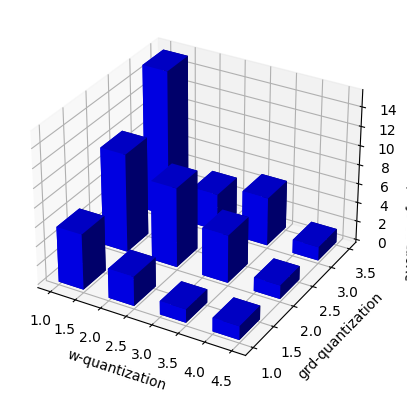

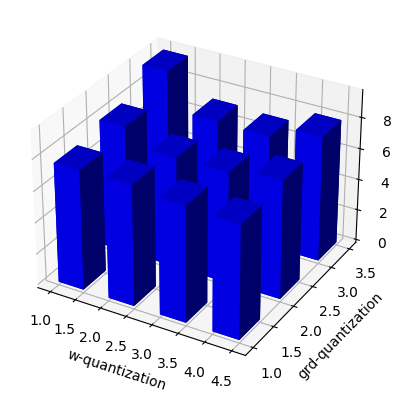

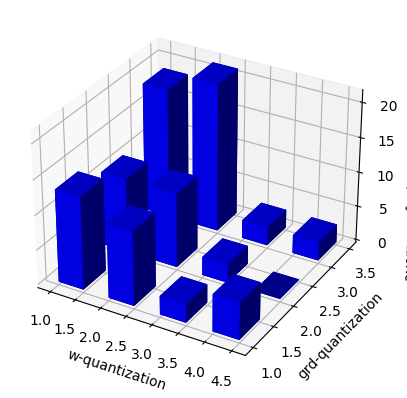

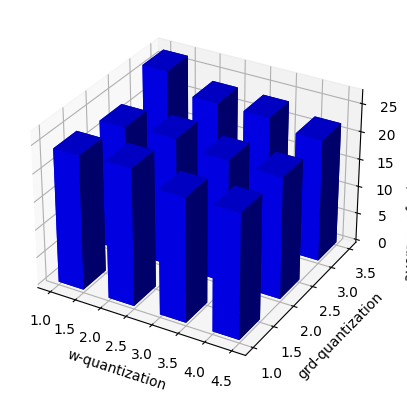

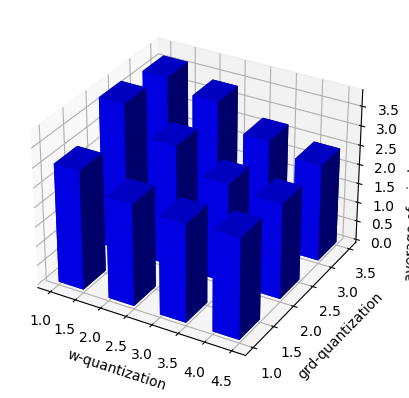

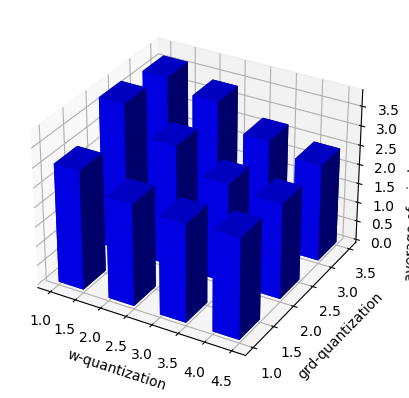

In [16]:
# normalized e_in barplots
for df in dfs:
    df = get_df(df)
    df = df[df["e in"] != -1]
    generate_plots(df, "e in")

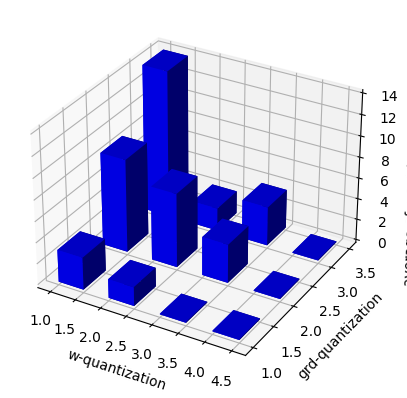

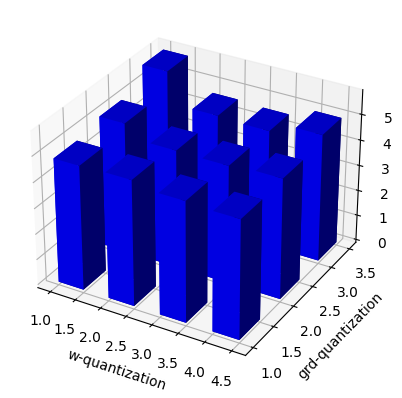

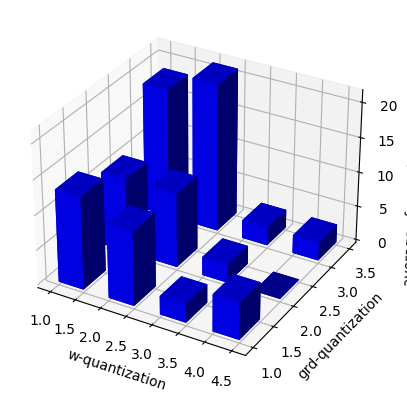

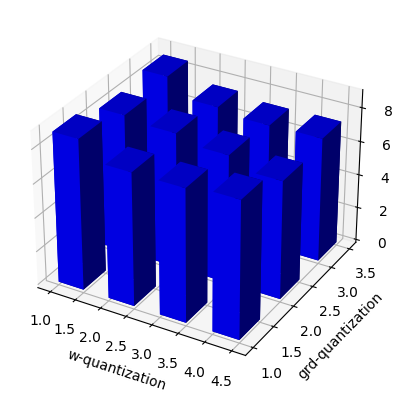

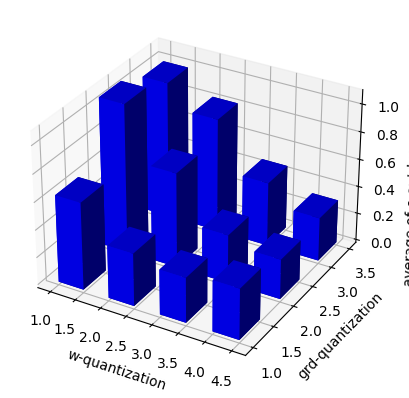

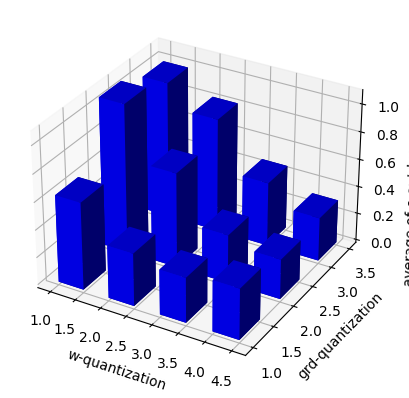

In [17]:
# normalized e_out heatmaps
for df in dfs:
    df = get_df(df)
    df = df[df["e out"] != -1]
    generate_plots(df, "e out")

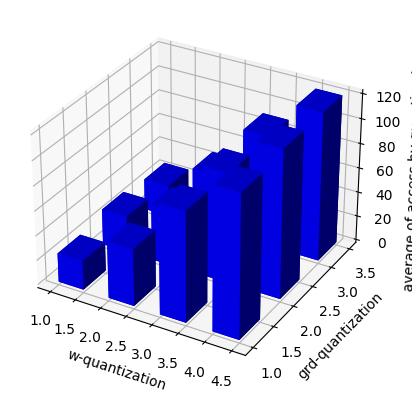

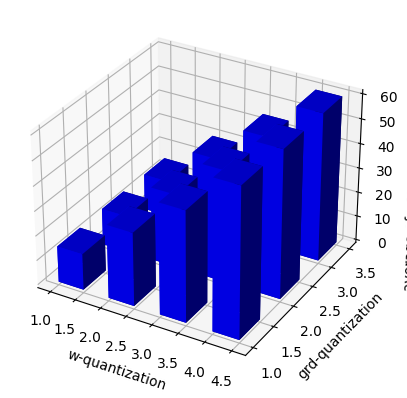

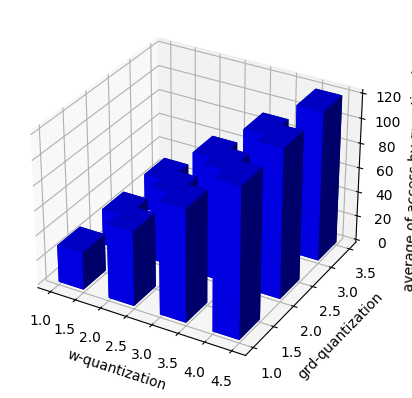

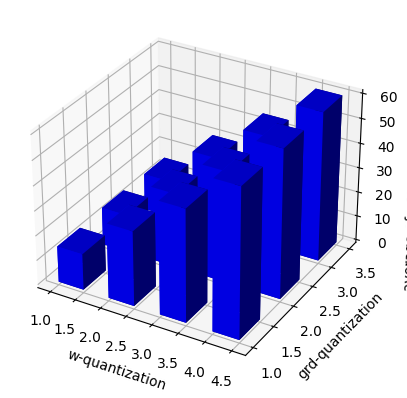

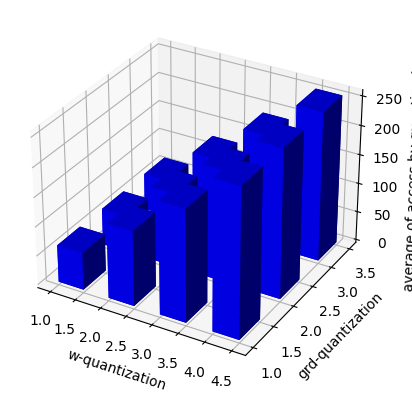

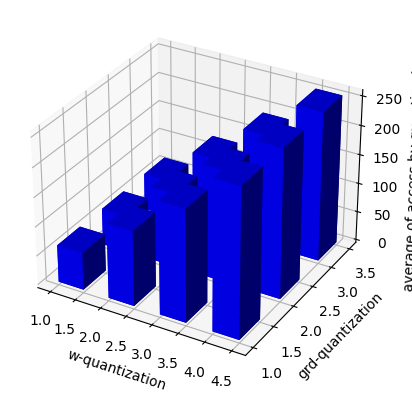

In [18]:
# access but in a hand wavy manner
for df in dfs:
    df = get_df(df)
    df = df[df["query type"] == "w"]
    generate_plots(df, "access")

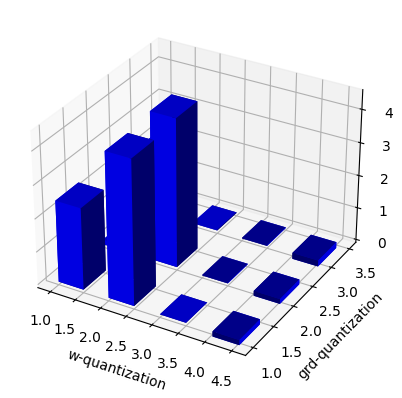

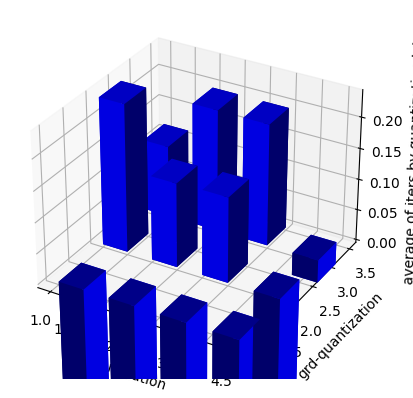

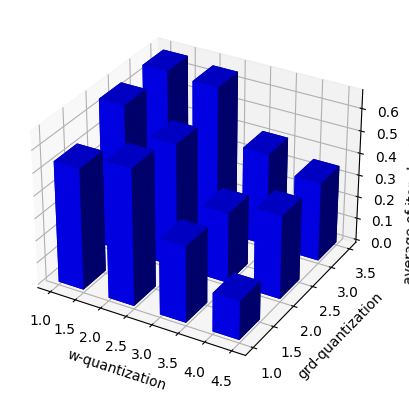

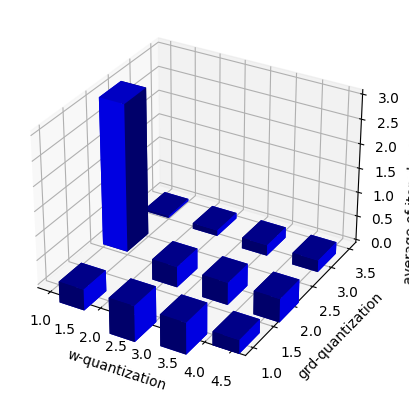

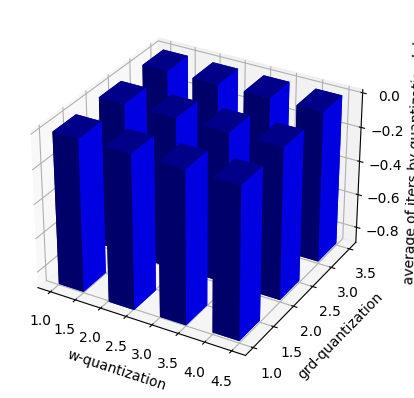

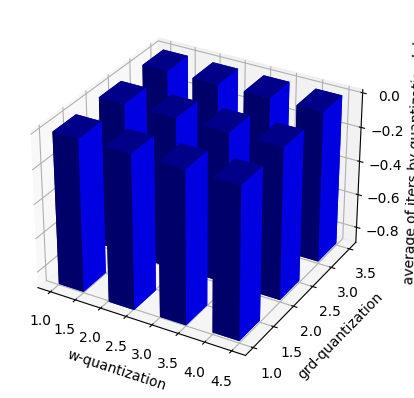

In [19]:
# normalized iterations
for df in dfs:
    df = get_df(df)
    df = df[df["iters"] != 0]
    generate_plots(df, "iters")

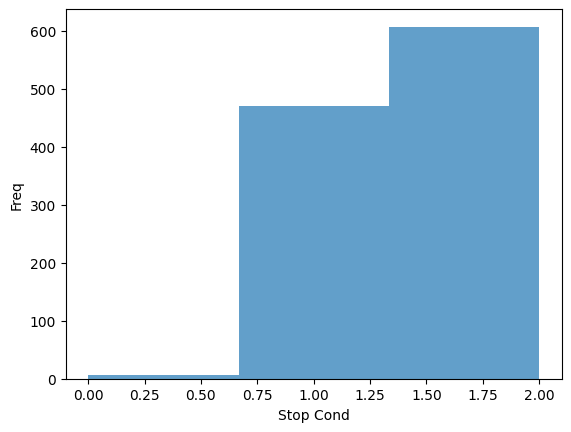

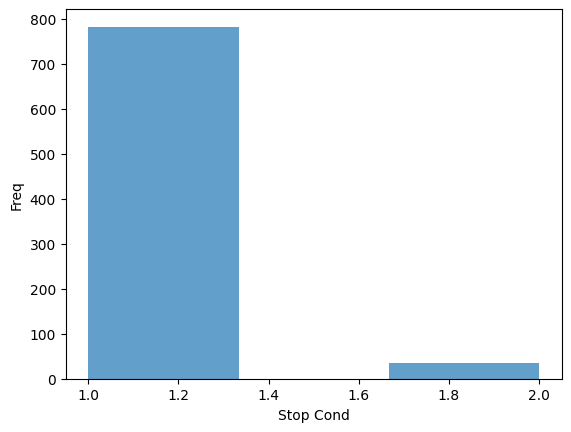

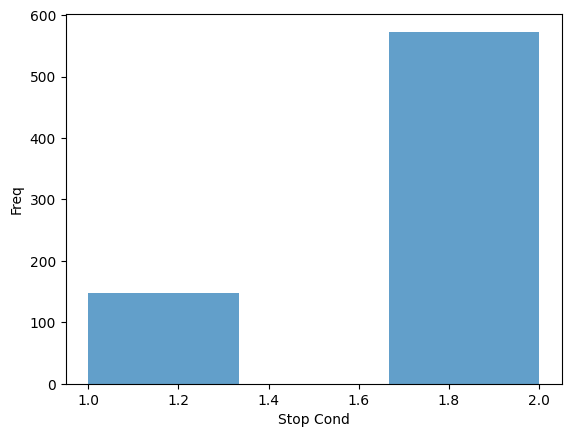

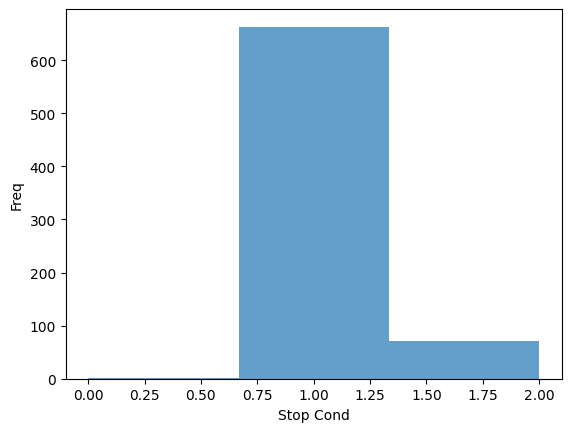

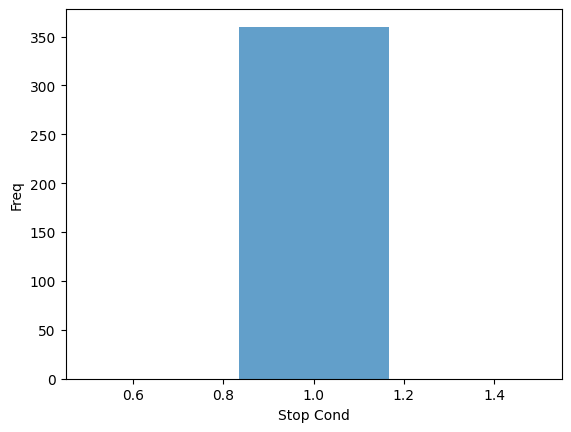

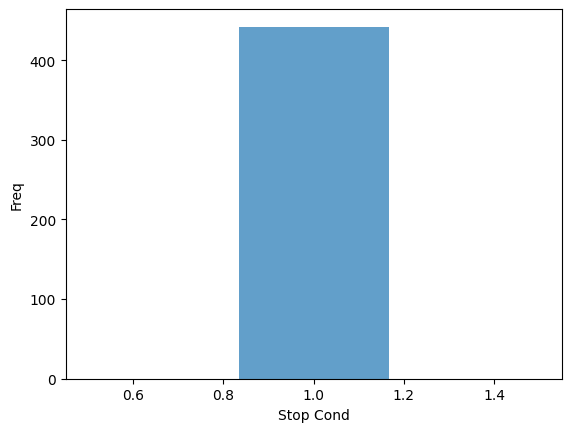

In [23]:
# time, maybe
for df in dfs:
    df = get_df(df)
    df = df[df['e in'] != -1]
    df['stop cond'].plot(kind='bar', bins=3, alpha=0.7)
    plt.xlabel('Stop Cond')
    plt.ylabel('Freq')
    plt.show()